In [ ]:
!pip install fbprophet

### Libraries

In [2]:
from fbprophet import Prophet
import pandas as pd

In [4]:
df = pd.read_csv('covid_19_clean_complete.csv')

In [5]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [11]:
df.shape

(49068, 10)

In [6]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object

In [10]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [14]:
df['Date'].nunique()

188

In [18]:
total = df.groupby('Date')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [19]:
total.head()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [22]:
df_prophet = total.rename(columns={'Date':'ds','Confirmed':'y'})

In [23]:
df_prophet.head()

,ds,y,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


### Define the model

In [24]:
m = Prophet()

In [25]:
model = m.fit(df_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Create future data for our prediction purpose

In [27]:
future_global = model.make_future_dataframe(periods=30,freq='D') # period of 30 days

In [28]:
future_global.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [29]:
df_prophet.shape

(188, 5)

In [30]:
future_global.shape

(218, 1)

In [31]:
df_prophet.tail()

,ds,y,Deaths,Recovered,Active
183,2020-07-23,15510481,633506,8710969,6166006
184,2020-07-24,15791645,639650,8939705,6212290
185,2020-07-25,16047190,644517,9158743,6243930
186,2020-07-26,16251796,648621,9293464,6309711
187,2020-07-27,16480485,654036,9468087,6358362


### Do predictions on our future data

In [33]:
predictions = model.predict(future_global)

In [34]:
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-1.063986e+04,-1.209358e+05,8.489202e+04,-1.063986e+04,-1.063986e+04,-10982.447793,-10982.447793,-10982.447793,-10982.447793,-10982.447793,-10982.447793,0.0,0.0,0.0,-2.162230e+04
1,2020-01-23,-7.901275e+03,-1.128029e+05,9.410275e+04,-7.901275e+03,-7.901275e+03,-1076.670504,-1076.670504,-1076.670504,-1076.670504,-1076.670504,-1076.670504,0.0,0.0,0.0,-8.977945e+03
2,2020-01-24,-5.162694e+03,-9.419144e+04,1.128977e+05,-5.162694e+03,-5.162694e+03,10097.471121,10097.471121,10097.471121,10097.471121,10097.471121,10097.471121,0.0,0.0,0.0,4.934777e+03
3,2020-01-25,-2.424113e+03,-9.209871e+04,1.188935e+05,-2.424113e+03,-2.424113e+03,13741.427160,13741.427160,13741.427160,13741.427160,13741.427160,13741.427160,0.0,0.0,0.0,1.131731e+04
4,2020-01-26,3.144674e+02,-9.214571e+04,1.174210e+05,3.144674e+02,3.144674e+02,7236.701390,7236.701390,7236.701390,7236.701390,7236.701390,7236.701390,0.0,0.0,0.0,7.551169e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,2.144058e+07,2.109955e+07,2.182382e+07,2.110008e+07,2.178822e+07,13741.427160,13741.427160,13741.427160,13741.427160,13741.427160,13741.427160,0.0,0.0,0.0,2.145432e+07
214,2020-08-23,2.164466e+07,2.126198e+07,2.204786e+07,2.128568e+07,2.200954e+07,7236.701390,7236.701390,7236.701390,7236.701390,7236.701390,7236.701390,0.0,0.0,0.0,2.165190e+07
215,2020-08-24,2.184875e+07,2.145705e+07,2.226118e+07,2.146526e+07,2.223326e+07,-2165.964784,-2165.964784,-2165.964784,-2165.964784,-2165.964784,-2165.964784,0.0,0.0,0.0,2.184658e+07
216,2020-08-25,2.205283e+07,2.160696e+07,2.247186e+07,2.165326e+07,2.245936e+07,-16850.516589,-16850.516589,-16850.516589,-16850.516589,-16850.516589,-16850.516589,0.0,0.0,0.0,2.203598e+07


In [35]:
predictions[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-2.162230e+04,-1.209358e+05,8.489202e+04
1,2020-01-23,-8.977945e+03,-1.128029e+05,9.410275e+04
2,2020-01-24,4.934777e+03,-9.419144e+04,1.128977e+05
3,2020-01-25,1.131731e+04,-9.209871e+04,1.188935e+05
4,2020-01-26,7.551169e+03,-9.214571e+04,1.174210e+05
...,...,...,...,...
213,2020-08-22,2.145432e+07,2.109955e+07,2.182382e+07
214,2020-08-23,2.165190e+07,2.126198e+07,2.204786e+07
215,2020-08-24,2.184658e+07,2.145705e+07,2.226118e+07
216,2020-08-25,2.203598e+07,2.160696e+07,2.247186e+07


### Visualise our predictions

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


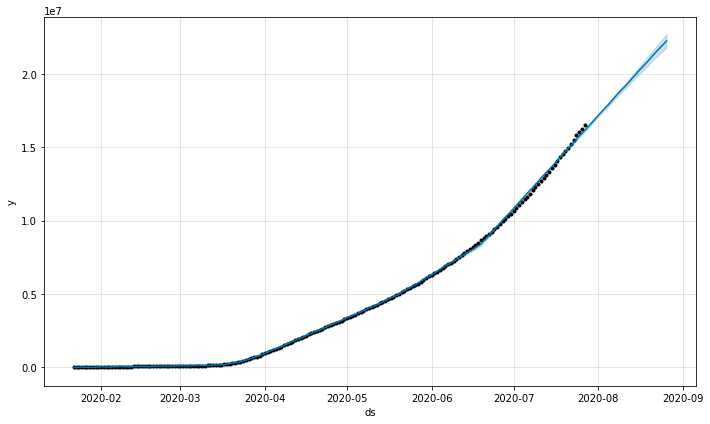

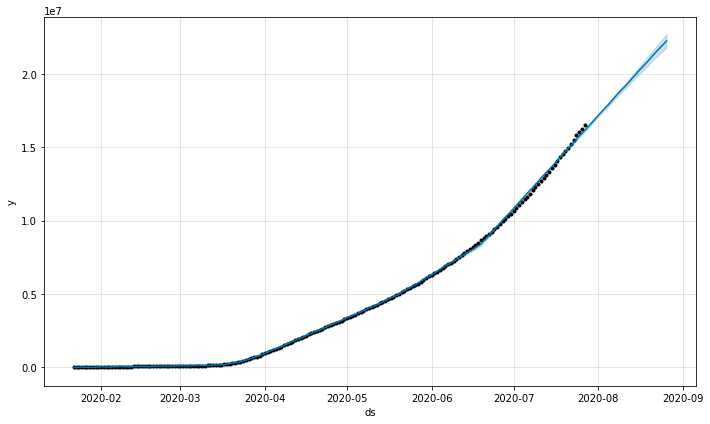

In [37]:
model.plot(predictions)

### Visualise the trend

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


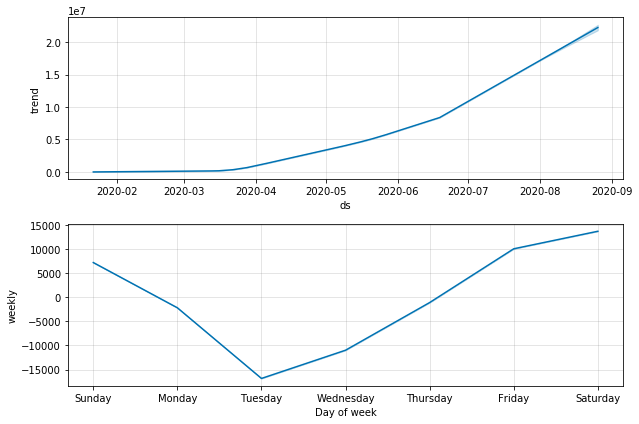

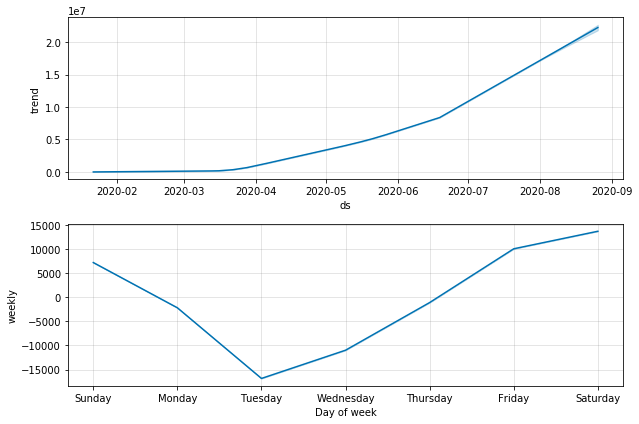

In [38]:
model.plot_components(predictions)

In [41]:
from fbprophet.plot import add_changepoints_to_plot

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will 

[[<matplotlib.lines.Line2D at 0x2cd446719c8>],

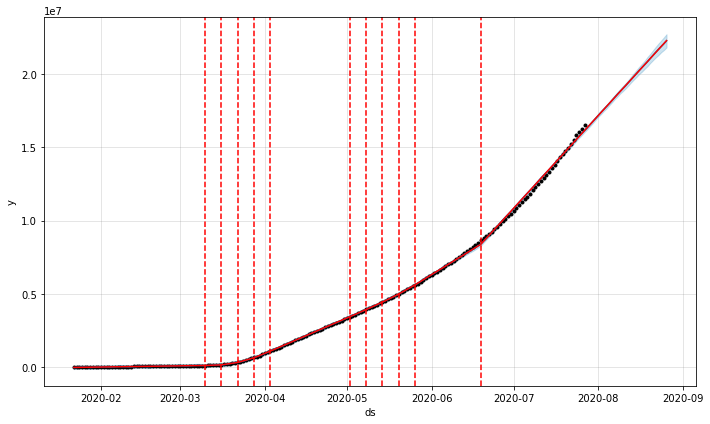

In [42]:
fig = model.plot(predictions)
add_changepoints_to_plot(fig.gca(),model,predictions)

### Cross validate our time series data

In [43]:
from fbprophet.diagnostics import cross_validation

In [47]:
df_cv = cross_validation(model,horizon="30 days",period="15 days",initial="90 days")
# horizon: how many days we have to cross validate

INFO:fbprophet:Making 5 forecasts with cutoffs between 2020-04-28 00:00:00 and 2020-06-27 00:00:00


In [48]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.201064e+06,3.195956e+06,3.206118e+06,3185195,2020-04-28
1,2020-04-30,3.285432e+06,3.279113e+06,3.291549e+06,3268876,2020-04-28
2,2020-05-01,3.369640e+06,3.361138e+06,3.378079e+06,3355922,2020-04-28
3,2020-05-02,3.450902e+06,3.438585e+06,3.462572e+06,3437608,2020-04-28
4,2020-05-03,3.530365e+06,3.512321e+06,3.546519e+06,3515244,2020-04-28


### Obtain Performance Metrics for your model

In [49]:
from fbprophet.diagnostics import performance_metrics

In [50]:
df_performance = performance_metrics(df_cv)

In [51]:
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,2.732177e+10,165292.978537,129431.475977,0.016894,0.017781,0.000000
1,4 days,3.783770e+10,194519.153621,151640.363022,0.019358,0.022609,0.000000
2,5 days,5.187132e+10,227752.759122,175493.706735,0.021809,0.025662,0.066667
3,6 days,6.958295e+10,263785.805797,202488.978430,0.024588,0.026660,0.133333
4,7 days,9.037899e+10,300630.981552,232841.149368,0.027870,0.031220,0.200000


In [52]:
from fbprophet.plot import plot_cross_validation_metric

C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\fbprophet\plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\fbprophet\plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_base

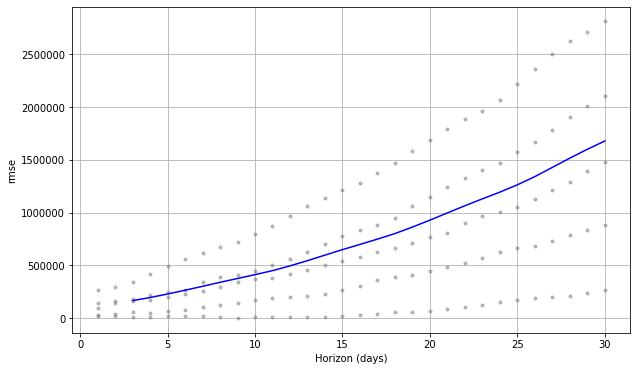

In [54]:
df_performance = plot_cross_validation_metric(df_cv,metric='rmse')

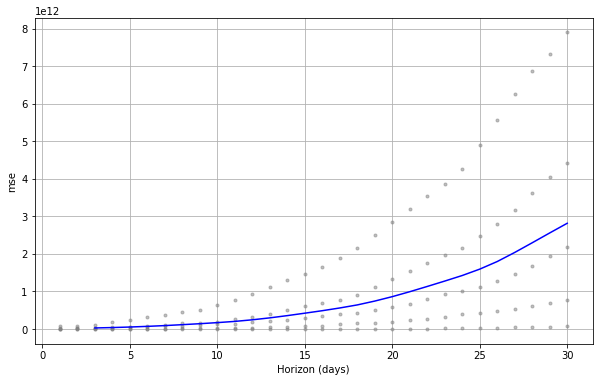

In [55]:
df_performance = plot_cross_validation_metric(df_cv,metric='mse')

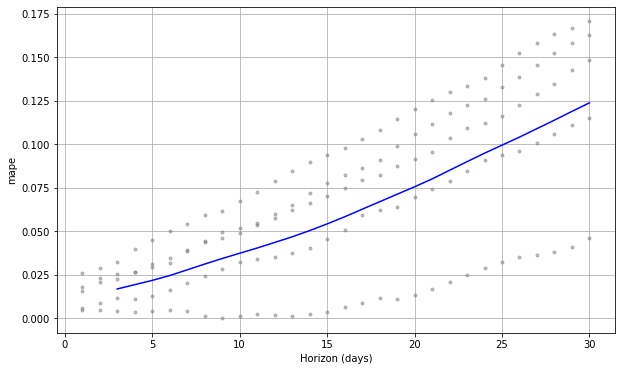

In [56]:
df_performance = plot_cross_validation_metric(df_cv,metric='mape')